In [111]:
%load_ext autoreload
%autoreload 2


# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm

from utils import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Dataset
genedata = pd.read_csv("genedata.csv")
genedata.head()

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,1,5,2.3383,10.5440,11.4653,10.4441,10.6311,7.7036,9.6444,7.8501,...,11.9394,11.1349,5.7066,8.2176,9.9062,9.0815,10.5098,11.8648,8.4341,6.7618
1,2,4,3.9151,9.5815,10.3992,9.8333,8.9781,7.0265,9.2761,7.3903,...,11.6547,7.7178,9.3558,7.5026,10.2106,8.9278,10.2466,11.3329,7.8209,7.4350
2,3,5,2.9322,9.3102,11.0756,9.8490,9.4291,8.0618,8.3874,7.9274,...,11.9372,11.2369,6.5860,9.1668,10.3315,9.7551,11.4392,10.7036,8.0041,8.5380
3,4,5,3.9470,8.5315,10.9836,9.3676,9.6856,7.5842,8.5774,8.3737,...,13.2541,11.8221,9.5261,7.4231,11.2862,9.8992,10.4067,11.9044,7.9843,8.5370
4,5,1,4.4618,9.1392,10.9183,10.0490,9.8290,6.5658,9.8122,9.0646,...,11.6416,11.5142,6.5539,7.8319,11.0100,10.1013,11.2682,10.8969,8.1959,8.2906


## Feature analysis

In [3]:
# check for missing values
genedata.isnull().sum().sum()

0

In [4]:
# check datatype of features
dtypes = [genedata[col].dtypes for col in genedata.columns[2:]]
set(dtypes)   

{dtype('float64')}

## Preprocessing

### Data dimension reduction

We can use Principal Component Analysis to reduce the dimensionality of the data while still keeping most of the variance of the original data.

PCA works by creating an eigendecomposition of the data matrix and transforming the data using the first k eigenvectors corresponding to the largest eigenvalues. 

In [50]:
genedata_reduced = preprocess(genedata, 2)


In [29]:
genedata_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,640,641
0,-2.338915,1.199608,1.643770,-0.110196,0.987351,1.258753,-0.337725,-1.045091,0.043355,-0.031207,...,-1.360784,-0.416337,-1.022948,-0.851702,0.598980,1.068503,-0.224551,-1.697016,0.903442,-1.911917
1,-0.349396,-0.310785,-1.710043,0.129058,-0.460341,1.306209,-0.904714,0.955517,-1.484310,-1.697733,...,-0.383665,-0.808750,0.557550,-0.601943,-0.216579,0.011743,0.260487,0.232204,-0.974949,-0.365289
2,-0.890424,-1.600045,0.711180,1.431888,1.042281,-0.060518,1.078257,1.385457,-2.341671,-0.161113,...,-0.050041,-0.157118,-0.027722,0.078287,-0.237308,-0.113985,0.320471,0.024115,0.277920,0.054810
3,-0.605801,-0.857792,1.566518,1.072505,0.569621,0.770059,-0.238786,0.715916,-1.124188,-0.566461,...,0.087521,-0.631299,1.501979,1.355165,-1.235898,-0.116360,-0.607071,0.424912,-0.373136,-0.728442
4,0.356611,-1.083233,0.515878,-0.806716,0.620077,-0.399827,-0.481715,-0.835079,0.205492,1.841923,...,0.657836,0.363120,-1.841756,-0.775933,-0.861350,-0.421738,0.061954,-0.045772,-0.598846,1.513185


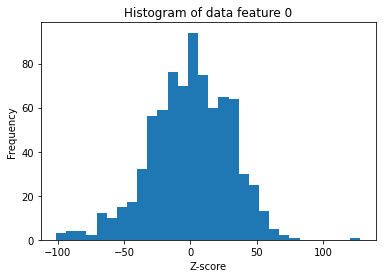

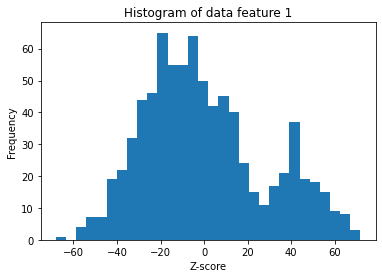

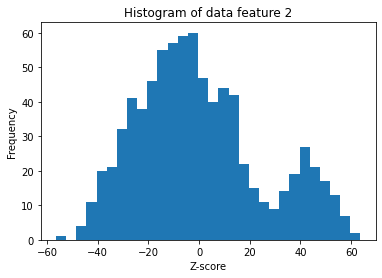

In [51]:
plot_hist(genedata_reduced)

## K-means clustering

100%|██████████| 12/12 [00:26<00:00,  2.24s/it]


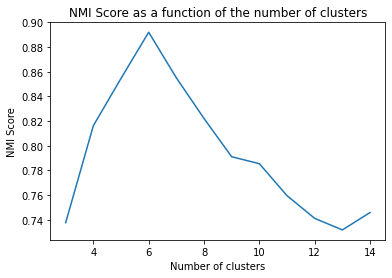

0.8920051050041518


In [123]:
scores = []
n_clusters = range(3, 15)
truth = genedata['class'].values - 1
for k in tqdm(n_clusters):
    preds, km = kmeans(genedata[genedata.columns.values[2:]], k)
    score = nmi(truth, preds, k)
    scores.append(score)
plt.plot(n_clusters, scores)
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI Score as a function of the number of clusters")
plt.show()

print(max(scores))

100%|██████████| 12/12 [00:03<00:00,  3.52it/s]


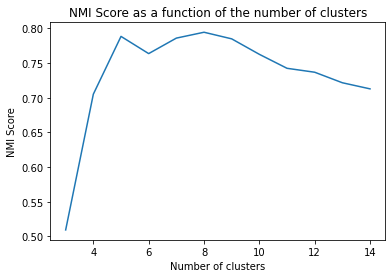

0.7945188765877217


In [124]:
scores = []
n_clusters = range(3, 15)
truth = genedata['class'].values - 1
for k in tqdm(n_clusters):
    preds, km = kmeans(genedata_reduced, k)
    score = nmi(truth, preds, k)
    scores.append(score)
plt.plot(n_clusters, scores)
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI Score as a function of the number of clusters")
plt.show()

print(max(scores))

## Hierarchical clustering